In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm_notebook

data = pd.read_csv('/content/drive/MyDrive/btcusdt_5m.csv')

data['Position'] = 0
data['signals'] = 0
data['EMA7'] = data['close'].ewm(span=7, adjust=False).mean()

  0%|          | 0/422340 [00:00<?, ?it/s]

<ipython-input-3-366ec5a15e5e>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['signals'][i] = 0
<ipython-input-3-366ec5a15e5e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Position'][i+1] = 1
<ipython-input-3-366ec5a15e5e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['signals'][i+1] = 1
<ipython-input-3-366ec5a15e5e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

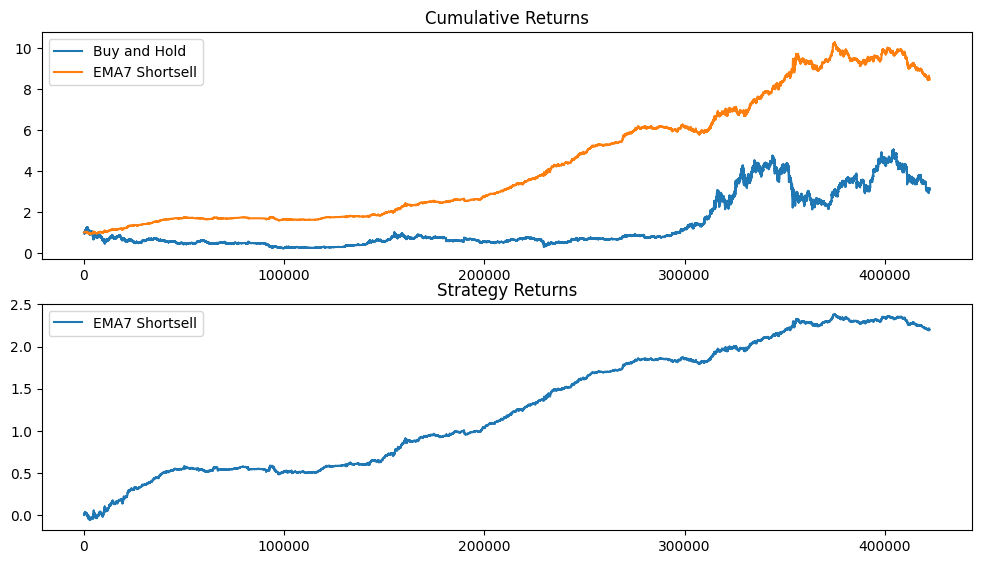

Sharpe Ratio: 2.9362


In [3]:
below = 0

for i in tqdm_notebook(range(1, len(data)-1)):
    if data['low'][i-1] > data['EMA7'][i-1] and data['close'][i] < data['low'][i-1]:
            data['Position'][i+1] = 1
            data['signals'][i+1] = 1
            stoploss = data['high'][i-1] * 1.005
            below = 5*data['close'][i] - stoploss
    elif data['low'][i] <= below:
            data['Position'][i+1] = 0
            data['signals'][i+1] = -1
            below = 0
    else:
          data['Position'][i+1] == data['Position'][i]
          data['signals'][i] = 0

data['DailyReturns'] = data['close'].pct_change()
data['StrategyReturns'] = data['Position'] * data['DailyReturns']
data['CumulativeReturns'] = (1 + data['DailyReturns']).cumprod()
data['CumulativeStrategyReturns'] = (1 + data['StrategyReturns']).cumprod()

average_strategy_return = data['StrategyReturns'].mean()
std_dev_strategy_return = data['StrategyReturns'].std()

data.to_csv('data.csv',index=True)
plt.figure(figsize=(12, 10))
plt.subplot(3, 1, 1)
plt.plot(data['CumulativeReturns'], label='Buy and Hold')
plt.plot(data['CumulativeStrategyReturns'], label='EMA7 Shortsell')
plt.legend()
plt.title('Cumulative Returns')

plt.subplot(3, 1, 2)
plt.plot(data['StrategyReturns'].cumsum(), label='EMA7 Shortsell')
plt.legend()
plt.title('Strategy Returns')

plt.show()

sharpe_ratio=(365*24*12*average_strategy_return-0.042)/(np.sqrt(365*24*12)*std_dev_strategy_return)
print(f'Sharpe Ratio: {sharpe_ratio:.4f}')

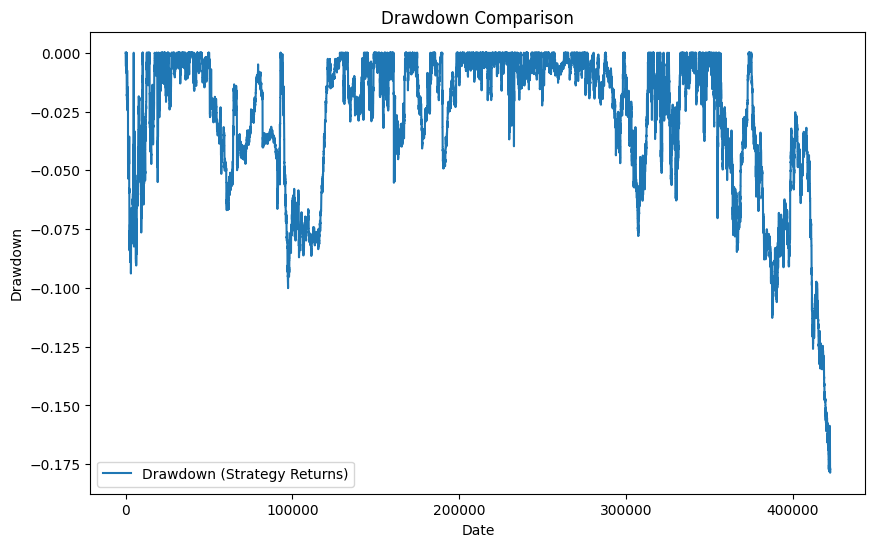

-0.027603519646469624

In [4]:
data['DrawdownStrategy'] = data['CumulativeStrategyReturns'] / data['CumulativeStrategyReturns'].cummax() - 1

# Plot the drawdowns
plt.figure(figsize=(10, 6))
plt.plot(data['DrawdownStrategy'], label='Drawdown (Strategy Returns)')
plt.xlabel('Date')
plt.ylabel('Drawdown')
plt.title('Drawdown Comparison')
plt.legend()
plt.show()

data['DrawdownStrategy'].mean()

In [5]:
data

,datetime,open,high,low,close,volume,Position,signals,EMA7,DailyReturns,StrategyReturns,CumulativeReturns,CumulativeStrategyReturns,DrawdownStrategy
0,2018-01-01 05:30:00,13715.65,13715.65,13576.28,13600.00,33.617798,0,0,13600.000000,NaN,NaN,NaN,NaN,NaN
1,2018-01-01 05:35:00,13600.00,13600.00,13501.01,13554.58,40.528679,0,0,13588.645000,-0.003340,-0.0,0.996660,1.000000,0.000000
2,2018-01-01 05:40:00,13554.58,13569.97,13400.01,13556.15,49.469536,0,0,13580.521250,0.000116,0.0,0.996776,1.000000,0.000000
3,2018-01-01 05:45:00,13533.75,13547.73,13402.00,13430.52,32.725614,0,0,13543.020938,-0.009267,-0.0,0.987538,1.000000,0.000000
4,2018-01-01 05:50:00,13440.01,13459.99,13410.44,13439.94,26.614135,0,0,13517.250703,0.000701,0.0,0.988231,1.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
422337,2022-01-12 05:10:00,42794.82,42822.21,42753.01,42790.03,61.098870,0,0,42778.908048,-0.000112,-0.0,3.146326,8.469125,-0.176928
422338,2022-01-12 05:15:00,42790.04,42819.89,42718.77,42736.01,39.718990,0,0,42768.183536,-0.001262,-0.0,3.142354,8.469125,-0.176928
422339,2022-01-12 05:20:00,42736.01,42736.02,42633.97,42674.32,55.094370,0,0,42744.717652,-0.001444,-0.0,3.137818,8.469125,-0.176928
422340,2022-01-12 05:25:00,42673.60,42739.92,42655.74,42729.29,69.675370,0,0,42740.860739,0.001288,0.0,3.141860,8.469125,-0.176928


In [8]:
data1 = data.drop(['Position', 'EMA7', 'DailyReturns', 'StrategyReturns', 'CumulativeReturns', 'CumulativeStrategyReturns', 'DrawdownStrategy'], axis=1)

In [9]:
data1

,datetime,open,high,low,close,volume,signals
0,2018-01-01 05:30:00,13715.65,13715.65,13576.28,13600.00,33.617798,0
1,2018-01-01 05:35:00,13600.00,13600.00,13501.01,13554.58,40.528679,0
2,2018-01-01 05:40:00,13554.58,13569.97,13400.01,13556.15,49.469536,0
3,2018-01-01 05:45:00,13533.75,13547.73,13402.00,13430.52,32.725614,0
4,2018-01-01 05:50:00,13440.01,13459.99,13410.44,13439.94,26.614135,0
...,...,...,...,...,...,...,...
422337,2022-01-12 05:10:00,42794.82,42822.21,42753.01,42790.03,61.098870,0
422338,2022-01-12 05:15:00,42790.04,42819.89,42718.77,42736.01,39.718990,0
422339,2022-01-12 05:20:00,42736.01,42736.02,42633.97,42674.32,55.094370,0
422340,2022-01-12 05:25:00,42673.60,42739.92,42655.74,42729.29,69.675370,0


In [10]:
data1.to_csv('data.csv',index=True)